<a href="https://colab.research.google.com/github/PilaData/Aircraft-dents-detection-/blob/master/Detectrone_%2B_Mask_R_CNN_%2B_Data_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://www.dropbox.com/s/k71drla863ux2y5/Data1.zip?dl=0 -O Data1.zip
!unzip Data1.zip

--2020-06-17 19:12:50--  https://www.dropbox.com/s/k71drla863ux2y5/Data1.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.1, 2620:100:601d:1::a27d:501
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/k71drla863ux2y5/Data1.zip [following]
--2020-06-17 19:12:51--  https://www.dropbox.com/s/raw/k71drla863ux2y5/Data1.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucedba0b96e798c98b8c902b3918.dl.dropboxusercontent.com/cd/0/inline/A53ll54WJdku00C48adYKOM3t8W7V-Ko4cQ5YyizUNVSAS7KT6c2SydZSYo6n_GxYN7aCcU2vdZm5HDj0s_ZLDh_iI1QHns4VRnsmAunMpr7uPg98sXf9OP6Mt-Ep7Eh3bk/file# [following]
--2020-06-17 19:12:51--  https://ucedba0b96e798c98b8c902b3918.dl.dropboxusercontent.com/cd/0/inline/A53ll54WJdku00C48adYKOM3t8W7V-Ko4cQ5YyizUNVSAS7KT6c2SydZSYo6n_GxYN7aCcU2vdZm5HDj0s_ZLDh_iI1QHns4VRnsmAunMpr7uPg98sXf9O

In [2]:
!ls Data/

train  train.json  val	val.json


In [3]:
!mkdir output

In [4]:
!pip install clodsa

     |████████████████████████████████| 5.7MB 4.4MB/s 
     |████████████████████████████████| 276kB 41.0MB/s 
  Created wheel for clodsa: filename=clodsa-1.2.39-py2.py3-none-any.whl size=72283 sha256=48207f8ec6e0251b695ed74c8dca809c922adcde76c25c487a18ad5074fcc81b
  Stored in directory: /root/.cache/pip/wheels/54/d4/a2/eb8df623c3fcd7d5d1045243fdf0ac1ccffa4f55090ef0e81b
  Created wheel for commentjson: filename=commentjson-0.8.3-cp36-none-any.whl size=11084 sha256=0ef24ddf32f4e87d8c225c4a211ffea8c158ae455e96ccfed99dcbb46262c323
  Stored in directory: /root/.cache/pip/wheels/e1/bc/bc/dc8064582197c1b8e947a8b0191d36b3101096067b83b6af5f
  Created wheel for lark-parser: filename=lark_parser-0.7.8-py2.py3-none-any.whl size=62513 sha256=4ba8131fe531816c42e9ea83fc71a1998058f2ba76fe3b55cdcd177828f82e06
  Stored in directory: /root/.cache/pip/wheels/01/a2/30/ebae6ffa73cf3aa1c972a24d4c78388afd910f91e43bf554aa
Successfully built clodsa commentjson lark-parser


In [5]:
PROBLEM = "instance_segmentation"
ANNOTATION_MODE = "coco"
INPUT_PATH = "/content/Data/train"
GENERATION_MODE = "linear"
OUTPUT_MODE = "coco"
OUTPUT_PATH= "output/"


In [6]:
from matplotlib import pyplot as plt
from clodsa.augmentors.augmentorFactory import createAugmentor
from clodsa.transformers.transformerFactory import transformerGenerator
from clodsa.techniques.techniqueFactory import createTechnique
import cv2
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
Using TensorFlow backend.


In [7]:
augmentor = createAugmentor(PROBLEM,ANNOTATION_MODE,OUTPUT_MODE,GENERATION_MODE,INPUT_PATH,
                            {"outputPath":OUTPUT_PATH})

In [8]:
transformer = transformerGenerator(PROBLEM)

In [9]:
for angle in [90,180]:
    rotate = createTechnique("rotate", {"angle" : angle})
    augmentor.addTransformer(transformer(rotate))

In [10]:
flip = createTechnique("flip",{"flip":1})
augmentor.addTransformer(transformer(flip))

In [11]:
augmentor.applyAugmentation()

In [12]:
!ls output/

0_10.jpg  0_24.png  0_6.jpg   1_20.jpg	1_33.jpg  2_17.jpg  2_2.jpg
0_11.jpg  0_25.JPG  0_7.jpg   1_21.jpg	1_3.jpg   2_18.jpg  2_30.jpg
0_12.jpg  0_26.jpg  0_8.jpg   1_22.jpg	1_4.jpg   2_19.jpg  2_31.jpg
0_13.jpg  0_27.jpg  0_9.jpg   1_23.JPG	1_5.jpg   2_1.jpg   2_32.jpg
0_14.png  0_28.JPG  1_10.jpg  1_24.png	1_6.jpg   2_20.jpg  2_33.jpg
0_15.jpg  0_29.jpg  1_11.jpg  1_25.JPG	1_7.jpg   2_21.jpg  2_3.jpg
0_17.jpg  0_2.jpg   1_12.jpg  1_26.jpg	1_8.jpg   2_22.jpg  2_4.jpg
0_18.jpg  0_30.jpg  1_13.jpg  1_27.jpg	1_9.jpg   2_23.JPG  2_5.jpg
0_19.jpg  0_31.jpg  1_14.png  1_28.JPG	2_10.jpg  2_24.png  2_6.jpg
0_1.jpg   0_32.jpg  1_15.jpg  1_29.jpg	2_11.jpg  2_25.JPG  2_7.jpg
0_20.jpg  0_33.jpg  1_17.jpg  1_2.jpg	2_12.jpg  2_26.jpg  2_8.jpg
0_21.jpg  0_3.jpg   1_18.jpg  1_30.jpg	2_13.jpg  2_27.jpg  2_9.jpg
0_22.jpg  0_4.jpg   1_19.jpg  1_31.jpg	2_14.png  2_28.JPG  annotation.json
0_23.JPG  0_5.jpg   1_1.jpg   1_32.jpg	2_15.jpg  2_29.jpg


In [13]:
!pip install pycocotools

In [14]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab

In [17]:
image_directory = 'output/'
annotation_file = 'output/annotation.json'

In [18]:
example_coco = COCO(annotation_file)

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


In [19]:
categories = example_coco.loadCats(example_coco.getCatIds())
category_names = [category['name'] for category in categories]
print('Custom COCO categories: \n{}\n'.format(' '.join(category_names)))

category_names = set([category['supercategory'] for category in categories])
print('Custom COCO supercategories: \n{}'.format(' '.join(category_names)))

Custom COCO categories: 
Dent

Custom COCO supercategories: 
Dent


In [20]:
category_ids = example_coco.getCatIds(catNms=['square'])
image_ids = example_coco.getImgIds(catIds=category_ids)
image_data = example_coco.loadImgs(image_ids[np.random.randint(0, len(image_ids))])[0]

In [21]:
image_data

{'coco_url': '',
 'date_captured': '',
 'file_name': '2_8.jpg',
 'flickr_url': '',
 'height': 600,
 'id': 93,
 'license': 1,
 'width': 800}

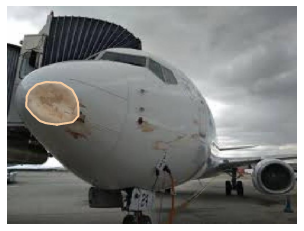

In [22]:
image = io.imread(image_directory + image_data['file_name'])
plt.imshow(image); plt.axis('off')
pylab.rcParams['figure.figsize'] = (8.0, 10.0)
annotation_ids = example_coco.getAnnIds(imgIds=image_data['id'], catIds=category_ids, iscrowd=None)
annotations = example_coco.loadAnns(annotation_ids)
example_coco.showAnns(annotations)

In [23]:
!pip install -U torch torchvision
!pip install git+https://github.com/facebookresearch/fvcore.git
!git clone https://github.com/facebookresearch/detectron2 detectron2_repo
!pip install -e detectron2_repo

Requirement already up-to-date: torch in /usr/local/lib/python3.6/dist-packages (1.5.0+cu101)
Requirement already up-to-date: torchvision in /usr/local/lib/python3.6/dist-packages (0.6.0+cu101)
  Cloning https://github.com/facebookresearch/fvcore.git to /tmp/pip-req-build-peihcyy0
  Running command git clone -q https://github.com/facebookresearch/fvcore.git /tmp/pip-req-build-peihcyy0
     |████████████████████████████████| 276kB 4.0MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.1-cp36-none-any.whl size=44904 sha256=38275dc30aa6b85c664eeda893f0a94c02d701101d06741b496e94ec142f0db3
  Stored in directory: /tmp/pip-ephem-wheel-cache-jkeq_om8/wheels/48/53/79/3c6485543a4455a0006f5db590ab9957622b6227011941de06
  Created wheel for pyyaml: filename=PyYAML-5.3.1-cp36-cp36m-linux_x86_64.whl size=44621 sha256=1e4c365d581dcddc905e2ed1c70f719fc94c12022f876935392147a5de21176e
  Stored in directory: /root/.cache/pip/wheels/a7/c1/ea/cf5bd31012e735dc1dfea3131a2d5eae7978b251083d6247bd
Successfully

Cloning into 'detectron2_repo'...
remote: Enumerating objects: 40, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 5488 (delta 5), reused 12 (delta 5), pack-reused 5448
Receiving objects: 100% (5488/5488), 2.59 MiB | 9.12 MiB/s, done.
Resolving deltas: 100% (3928/3928), done.
Obtaining file:///content/detectron2_repo
  Created wheel for pycocotools: filename=pycocotools-2.0.1-cp36-cp36m-linux_x86_64.whl size=267030 sha256=5ce26c0459167fbaa479a03b666c82e3f64fb8e35fc912d34e8dbcdd4c259002
  Stored in directory: /root/.cache/pip/wheels/86/19/08/49b25f258ead1f861c9ab2fc41f73636f2928859adbb0e9797
Successfully built pycocotools
  Found existing installation: pycocotools 2.0.0
    Uninstalling pycocotools-2.0.0:
      Successfully uninstalled pycocotools-2.0.0
  Running setup.py develop for detectron2


In [1]:

import torch, torchvision
import numpy as np
import pandas as pd
import random
import json
import cv2
import os
os.chdir('/content/detectron2_repo')
import detectron2
from detectron2.engine import DefaultPredictor, DefaultTrainer
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.data.datasets import register_coco_instances
from detectron2.structures import BoxMode
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.utils.logger import setup_logger
setup_logger()
from detectron2.evaluation.coco_evaluation import COCOEvaluator

import itertools
from itertools import groupby
from google.colab.patches import cv2_imshow

from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval
from pycocotools import mask as maskutil
from pycocotools import mask as maskUtils

In [2]:
# register training and test datasets to Detectron2
register_coco_instances("T", {}, "/content/output/annotation.json", "/content/output/")
register_coco_instances("V", {}, "/content/Data/train/annotations.json", "/content/Data/train/")

# metadata
train_metadata = MetadataCatalog.get("T")
test_metadata = MetadataCatalog.get("V")

# dataset dictionary
train_dataset_dicts = DatasetCatalog.get("T")
test_dataset_dicts = DatasetCatalog.get("V")

from detectron2.data.datasets import register_coco_instances


WARNING [06/17 19:25:59 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[06/17 19:25:59 d2.data.datasets.coco]: Loaded 96 images in COCO format from /content/output/annotation.json
WARNING [06/17 19:25:59 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[06/17 19:25:59 d2.data.datasets.coco]: Loaded 32 images in COCO format from /content/Data/train/annotations.json


In [3]:
import torch, torchvision
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

import glob

import os
import ntpath
import numpy as np
import cv2
import random
import itertools
import pandas as pd
from tqdm import tqdm
import urllib
import json
import PIL.Image as Image

from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor, DefaultTrainer
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer, ColorMode
from detectron2.data import DatasetCatalog, MetadataCatalog, build_detection_test_loader
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.structures import BoxMode

import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
class CocoTrainer(DefaultTrainer):

  @classmethod
  def build_evaluator(cls, cfg, dataset_name, output_folder=None):

    if output_folder is None:
        os.makedirs("coco_eval", exist_ok=True)
        output_folder = "coco_eval"

    return COCOEvaluator(dataset_name, cfg, False, output_folder)

In [5]:
cfg = get_cfg()

cfg.merge_from_file(
  model_zoo.get_config_file(
    "COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x.yaml"
  )
)

cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(
  "COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x.yaml"
)

In [6]:
cfg.DATASETS.TRAIN = ("T",)
cfg.DATASETS.TEST = ("V",)
cfg.DATALOADER.NUM_WORKERS = 4

In [7]:
cfg.SOLVER.IMS_PER_BATCH = 4
cfg.SOLVER.BASE_LR = 0.001
cfg.SOLVER.WARMUP_ITERS = 1000
cfg.SOLVER.MAX_ITER = 1500
cfg.SOLVER.STEPS = (1000, 1500)
cfg.SOLVER.GAMMA = 0.05

In [8]:

cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 64
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1

cfg.TEST.EVAL_PERIOD = 500

In [9]:
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)

trainer = CocoTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()

[06/17 19:26:10 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

Unable to load 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (2, 1024) in the model!
Unable to load 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (2,) in the model!
Unable to load 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 1024) in the checkpoint but (4, 1024) in the model!
Unable to load 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (4,) in the model!
Unable to load 'roi_heads.mask_head.predictor.weight' to the model due to incompatible shapes: (80, 256, 1, 1) in the checkpoint but (1, 256, 1, 1) in the model!
Unable to load 'roi_heads.mask_head.predictor.bias' to the model due to incompatible shapes: (80,) in the checkpoint but (1,) in the model!


[06/17 19:26:12 d2.engine.train_loop]: Starting training from iteration 0
[06/17 19:26:43 d2.utils.events]:  eta: 0:38:56  iter: 19  total_loss: 1.870  loss_cls: 0.553  loss_box_reg: 0.448  loss_mask: 0.687  loss_rpn_cls: 0.114  loss_rpn_loc: 0.011  time: 1.5626  data_time: 0.0538  lr: 0.000020  max_mem: 9422M
[06/17 19:27:14 d2.utils.events]:  eta: 0:37:53  iter: 39  total_loss: 1.672  loss_cls: 0.456  loss_box_reg: 0.431  loss_mask: 0.667  loss_rpn_cls: 0.117  loss_rpn_loc: 0.012  time: 1.5490  data_time: 0.0316  lr: 0.000040  max_mem: 9423M
[06/17 19:27:45 d2.utils.events]:  eta: 0:37:14  iter: 59  total_loss: 1.459  loss_cls: 0.345  loss_box_reg: 0.377  loss_mask: 0.628  loss_rpn_cls: 0.061  loss_rpn_loc: 0.010  time: 1.5446  data_time: 0.0285  lr: 0.000060  max_mem: 9423M
[06/17 19:28:16 d2.utils.events]:  eta: 0:37:14  iter: 79  total_loss: 1.429  loss_cls: 0.331  loss_box_reg: 0.448  loss_mask: 0.560  loss_rpn_cls: 0.049  loss_rpn_loc: 0.008  time: 1.5462  data_time: 0.0295  lr:

In [10]:
%load_ext tensorboard

In [11]:
%tensorboard --logdir output

<IPython.core.display.Javascript object>

In [12]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.85
predictor = DefaultPredictor(cfg)

In [14]:
evaluator = COCOEvaluator("V", cfg, False, output_dir="./output/")
val_loader = build_detection_test_loader(cfg, "V")
inference_on_dataset(trainer.model, val_loader, evaluator)

WARNING [06/17 20:14:18 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[06/17 20:14:18 d2.data.datasets.coco]: Loaded 32 images in COCO format from /content/Data/train/annotations.json
[06/17 20:14:18 d2.data.common]: Serializing 32 elements to byte tensors and concatenating them all ...
[06/17 20:14:18 d2.data.common]: Serialized dataset takes 0.02 MiB
[06/17 20:14:18 d2.evaluation.evaluator]: Start inference on 32 images
[06/17 20:14:20 d2.evaluation.evaluator]: Inference done 11/32. 0.1765 s / img. ETA=0:00:03
[06/17 20:14:24 d2.evaluation.evaluator]: Total inference time: 0:00:05.012217 (0.185638 s / img per device, on 1 devices)
[06/17 20:14:24 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:04 (0.176661 s / img per device, on 1 devices)
[06/17 20:14:24 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[06/17 20:14:24 d2.evaluation.coco_evaluation]: Saving results to ./output/c

OrderedDict([('bbox',
              {'AP': 79.96457856762042,
               'AP50': 97.79977997799779,
               'AP75': 83.89796030567925,
               'APl': 98.70766023970819,
               'APm': 94.13531353135313,
               'APs': 49.69897459670779}),
             ('segm',
              {'AP': 73.7424056856401,
               'AP50': 99.43422913719942,
               'AP75': 73.07032372043366,
               'APl': 90.8030803080308,
               'APm': 88.32783278327832,
               'APs': 43.43572370927616})])

In [31]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5   # set the testing threshold for this model
cfg.DATASETS.TEST = ("V", )
predictor = DefaultPredictor(cfg)

Unable to load 'proposal_generator.rpn_head.conv.weight' to the model due to incompatible shapes: (256, 256, 3, 3) in the checkpoint but (1024, 1024, 3, 3) in the model!
Unable to load 'proposal_generator.rpn_head.conv.bias' to the model due to incompatible shapes: (256,) in the checkpoint but (1024,) in the model!
Unable to load 'proposal_generator.rpn_head.objectness_logits.weight' to the model due to incompatible shapes: (3, 256, 1, 1) in the checkpoint but (15, 1024, 1, 1) in the model!
Unable to load 'proposal_generator.rpn_head.objectness_logits.bias' to the model due to incompatible shapes: (3,) in the checkpoint but (15,) in the model!
Unable to load 'proposal_generator.rpn_head.anchor_deltas.weight' to the model due to incompatible shapes: (12, 256, 1, 1) in the checkpoint but (60, 1024, 1, 1) in the model!
Unable to load 'proposal_generator.rpn_head.anchor_deltas.bias' to the model due to incompatible shapes: (12,) in the checkpoint but (60,) in the model!
Unable to load 'pro

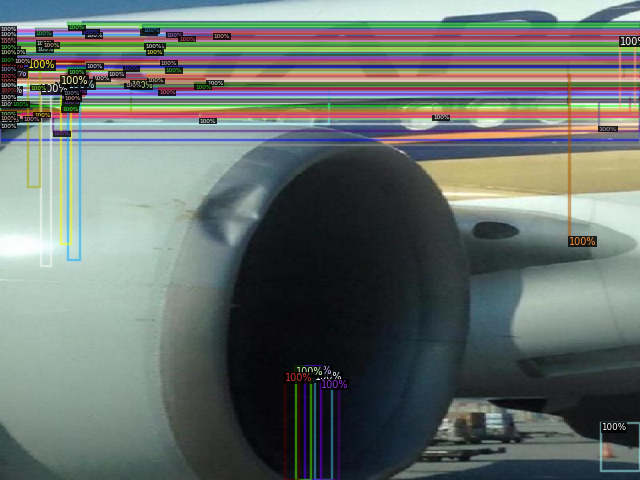

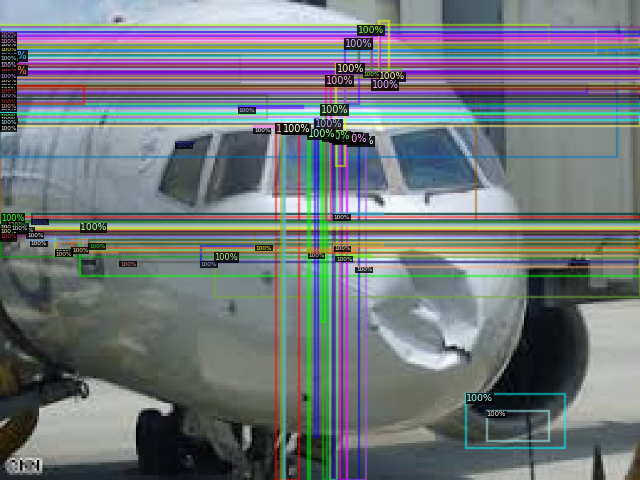

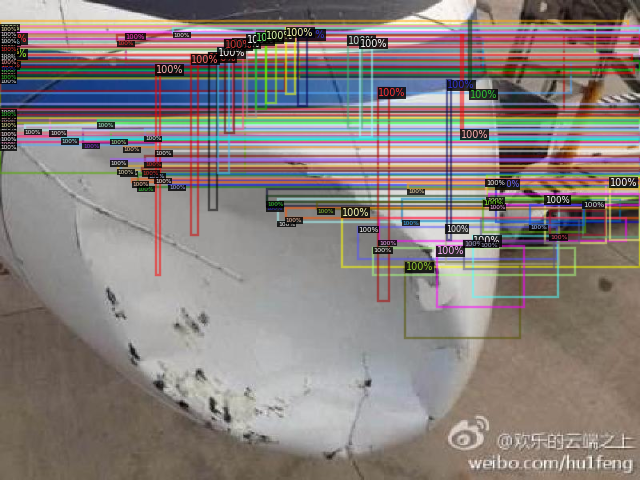

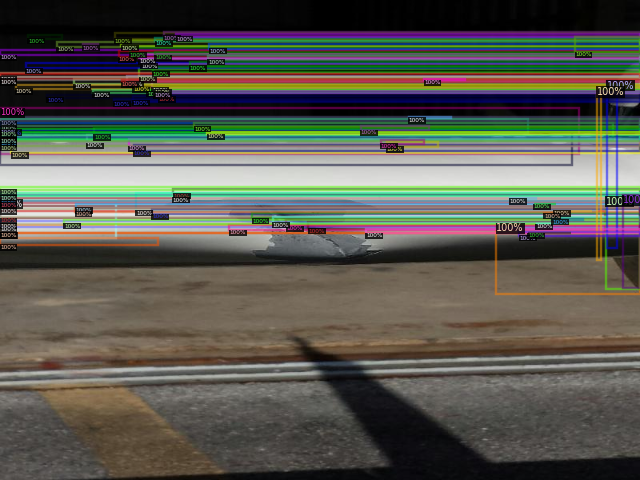

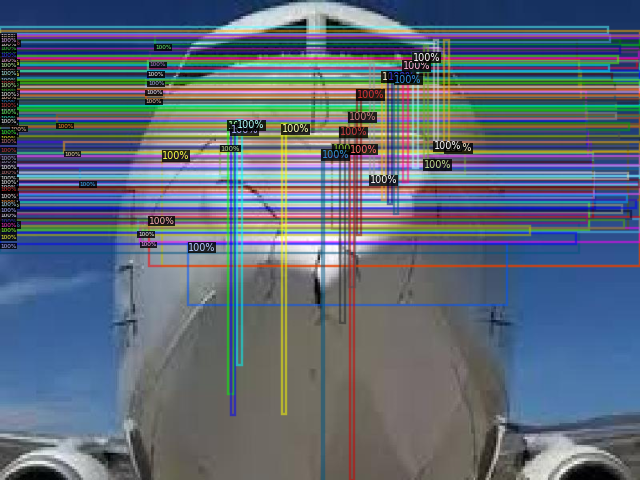

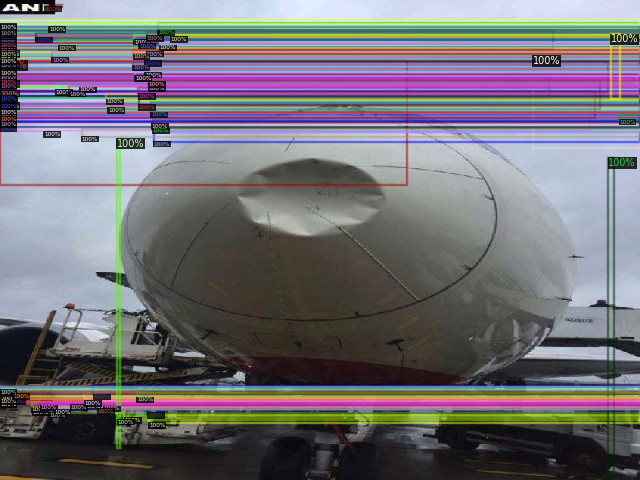

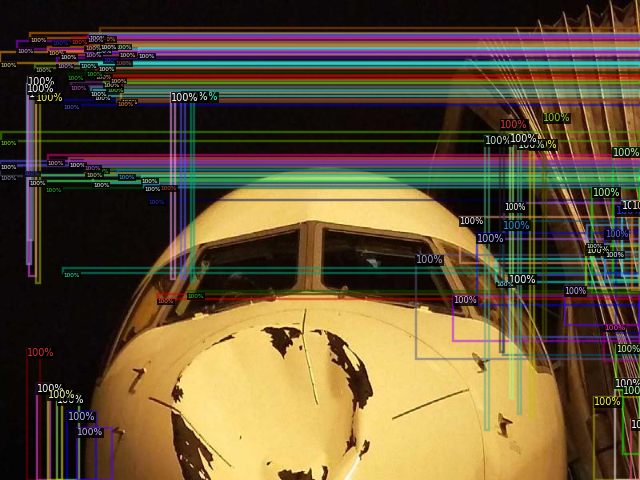

In [44]:
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
import os
import random
from detectron2.utils.visualizer import Visualizer
from detectron2.data.datasets import register_coco_instances
from detectron2.utils.visualizer import ColorMode
import random
from detectron2.utils.visualizer import Visualizer


for d in random.sample(test_dataset_dicts, 7):    
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)
    v = Visualizer(im[:, :, ::-1],
                   metadata=test_metadata, 
                   scale=0.8, 
                   
      )
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    cv2_imshow(v.get_image()[:, :, ::-1])